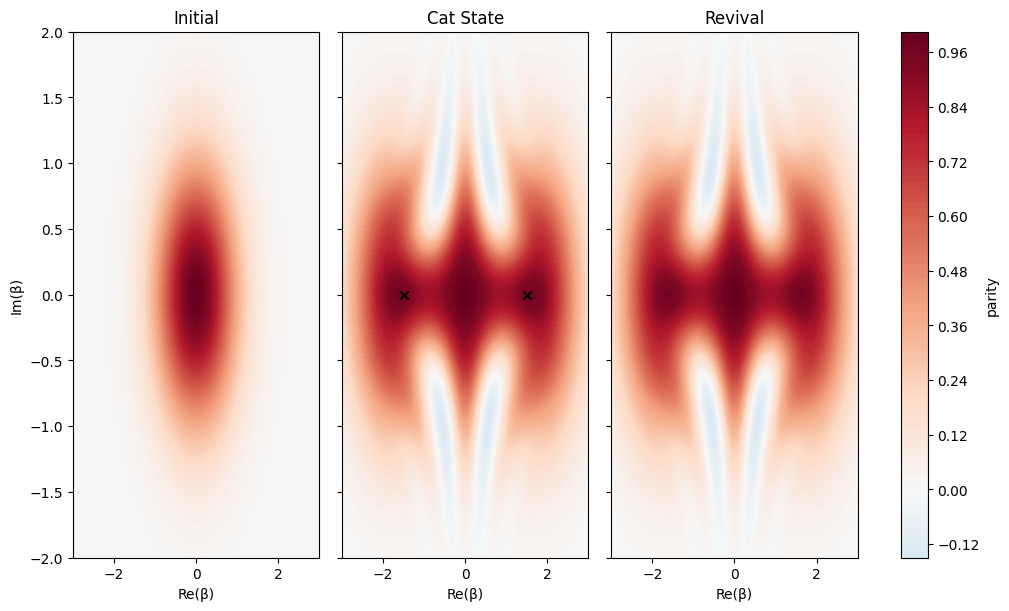

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize


def simulate_wigner(x_range, y_range, alpha, fringe_scale=0.5):
    X, Y = np.meshgrid(x_range, y_range)

    state_1 = np.exp(-((X-alpha)**2 + Y**2))
    state_2 = np.exp(-((X+alpha)**2 + Y**2))

    interference = np.exp(-(X**2 + Y**2)) * np.cos(fringe_scale * X * Y)

    W = (state_1 + state_2 + interference) / 2
    W /= np.max(np.abs(W))  # normalization
    return W

x_range = np.linspace(-3, 3, 100)
y_range = np.linspace(-2, 2, 100)


wigner_initial = simulate_wigner(x_range, y_range, alpha=0.0)
wigner_cat = simulate_wigner(x_range, y_range, alpha=1.75, fringe_scale=5)
wigner_revival = simulate_wigner(x_range, y_range, alpha=1.75, fringe_scale=0)


fig, axs = plt.subplots(1, 3, figsize=(10, 6), constrained_layout=True)


axs[0].contourf(x_range, y_range, wigner_initial, levels=100, cmap='RdBu_r', norm=Normalize(-1, 1))
axs[0].set_title('Initial')
axs[1].contourf(x_range, y_range, wigner_cat, levels=100, cmap='RdBu_r', norm=Normalize(-1, 1))
axs[1].scatter([-1.5, 1.5], [0, 0], color='black', marker='x')
axs[1].set_title('Cat State')
axs[2].contourf(x_range, y_range, wigner_revival, levels=100, cmap='RdBu_r', norm=Normalize(-1, 1))
axs[2].set_title('Revival')

# Adjust labels
for ax in axs.flat:
    ax.set(xlabel='Re(β)', ylabel='Im(β)')
    ax.label_outer()

plt.colorbar(axs[2].contourf(x_range, y_range, wigner_cat, levels=100, cmap='RdBu_r', norm=Normalize(-1, 1)), ax=axs, location='right', label='parity')
plt.show()